In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model_data_lr = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

## **Data Cleaning/Engineering**

We had already cleaned and prepared the data. Here are just some further tweaks neeed

In [4]:
model_data_lr.columns


Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [5]:
model_data_lr[['STATE', 'COUNTY_STATE']]

,STATE,COUNTY_STATE
0,CA,Plumas County CA
1,CA,El Dorado County CA
2,CA,Placer County CA
3,CA,Alpine County CA
4,CA,Alpine County CA
...,...,...
1682336,CO,Mesa County CO
1682337,CA,Madera County CA
1682338,MT,Ravalli County MT
1682339,WA,Yakima County WA


In [6]:
model_data_lr['STATE'] = model_data_lr['STATE'].astype('category')
model_data_lr['STATE'] = model_data_lr['STATE'].cat.codes.astype(int) # Numerical values

In [7]:
model_data_lr['COUNTY_STATE'] = model_data_lr['COUNTY_STATE'].astype('category')
model_data_lr['COUNTY_STATE'] = model_data_lr['COUNTY_STATE'].cat.codes.astype(int) # Numerical values

In [8]:
model_data_lr['NWCG_GENERAL_CAUSE'] = model_data_lr['NWCG_GENERAL_CAUSE'].astype('category')
model_data_lr['NWCG_GENERAL_CAUSE'] = model_data_lr['NWCG_GENERAL_CAUSE'].cat.codes.astype(int) # Numerical values

In [9]:
model_data_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682341 entries, 0 to 1682340
Data columns (total 42 columns):
 #   Column                                                         Non-Null Count    Dtype  
---  ------                                                         --------------    -----  
 0   FIRE_YEAR                                                      1682341 non-null  int64  
 1   NWCG_GENERAL_CAUSE                                             1682341 non-null  int64  
 2   FIRE_SIZE                                                      1682341 non-null  float64
 3   DURATION                                                       1682341 non-null  float64
 4   STATE                                                          1682341 non-null  int64  
 5   PRECIPITATION                                                  1682341 non-null  float64
 6   TEMPERATURE                                                    1682341 non-null  float64
 7   WIND_SPEED                          

In [10]:
model_data_lr['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
12    453517
1     405877
6     231547
0     219102
2     141487
10     69984
5      43018
11     42540
8      29661
9      19660
4      15376
7       8149
3       2423
Name: count, dtype: int64

0 - Arson

1 - Debris and open burning

2 - Equipment and vehicle use

3 - Firearms and explosives use

4 - Fireworks

5 - Misuse of fire by a minor

6 - Natural

7 - Other causes

8 - Power supply

9 - Railroad operations and maintenance

10 - Recreation and ceremony

11 - Smoking

12 - Undetermined

## **Bulding/Training Model**

**Logistic Regression - Dataset 1**

In [11]:
X = model_data_lr.drop(columns=['NWCG_GENERAL_CAUSE'])

In [12]:
X

,FIRE_YEAR,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,DAY_OF_YEAR,...,OWNER_DESCR = _FEDERAL,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL
0,2005,0.10,0.0,3,0.01,0.49,3.76,1728,2,33,...,0,0,0,1,0,0,0,0,0,0
1,2004,0.25,0.0,3,0.00,13.36,2.62,1442,2,133,...,0,0,0,1,0,0,0,0,0,0
2,2004,0.10,0.0,3,0.41,19.16,1.80,903,0,152,...,0,0,0,0,0,0,1,0,0,0
3,2004,0.10,5.0,3,0.16,19.36,1.91,2630,0,180,...,0,0,0,1,0,0,0,0,0,0
4,2004,0.10,5.0,3,0.16,19.36,1.91,2630,0,180,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682336,2020,1.00,0.0,4,2.12,21.78,4.76,1479,4,157,...,0,0,0,0,0,0,1,0,0,0
1682337,2020,100.00,0.0,3,0.00,29.16,2.19,633,5,193,...,0,0,0,0,0,0,0,1,0,0
1682338,2020,50.00,0.0,23,2.74,16.00,1.29,1817,3,240,...,0,0,0,0,0,0,1,0,0,0
1682339,2020,24892.00,3.0,44,0.01,26.43,3.31,292,0,230,...,1,0,0,0,0,0,0,0,0,0


In [13]:
y = model_data_lr['NWCG_GENERAL_CAUSE']

In [14]:
y

0           8
1           6
2           1
3           6
4           6
           ..
1682336     6
1682337    12
1682338     6
1682339     6
1682340    12
Name: NWCG_GENERAL_CAUSE, Length: 1682341, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### **Trying normalized and unnormalized data to see what works better**

In [16]:
# Preprocess the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [17]:
# Train models
model_normalized = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_normalized.fit(X_train_normalized, y_train)

model_unnormalized = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_unnormalized.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(multi_class='multinomial')

## **Model Evaluation**

In [18]:
# Evaluate models
y_pred_normalized = model_normalized.predict(X_test_normalized)
f1_normalized = f1_score(y_test, y_pred_normalized, average='weighted')

y_pred_unnormalized = model_unnormalized.predict(X_test)
f1_unnormalized = f1_score(y_test, y_pred_unnormalized, average='weighted')

In [19]:
f1_normalized

0.4877709354481149

In [20]:
f1_unnormalized

0.2770902259527882

In [ ]:
report = classification_report(y_test, y_pred_normalized, output_dict=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report_df = pd.DataFrame(report).transpose()

In [ ]:
report_df

,precision,recall,f1-score,support
0,0.342886,0.123341,0.181422,43846.0000
1,0.412684,0.694599,0.517754,81398.0000
2,0.288188,0.049274,0.084159,28372.0000
3,0.217143,0.080851,0.117829,470.0000
4,0.584746,0.179922,0.275174,3068.0000
5,0.921018,0.964662,0.942335,8631.0000
6,1.000000,1.000000,1.000000,46494.0000
7,0.000000,0.000000,0.000000,1621.0000
8,0.319444,0.003901,0.007708,5896.0000
9,0.000000,0.000000,0.000000,3968.0000


CONSIDERATIONS

Recap:

0 - Arson

1 - Debris and open burning

2 - Equipment and vehicle use

3 - Firearms and explosives use

4 - Fireworks

5 - Misuse of fire by a minor

6 - Natural

7 - Other causes

8 - Power supply

9 - Railroad operations and maintenance

10 - Recreation and ceremony

11 - Smoking

12 - Undetermined

Analysis:

 - Model predicted 100% of the "6 - Natural" causes, this is because we have a column NWCG_CAUSE_CLASSIFICATION with the values: human, natural or undetermined. So, it's just pairing natural with natural. But if we wanted to predict the cause in real life, we wouldn't have this info beforehand. So, I think we need to drop this column

- Same as above happened with "5 - Misuse of fire by a minor". We also have a column that says the age. So we should drop "NWCG_CAUSE_AGE_CATEGORY" as well

- Model couldn't predict "7 - Other causes" at all. This category is weird indeed, we should merge it with "12 - Undetermined"

- Model couldn't predict "9 - Railroad operations and maintenance", "11 - Smoking" at all and had a very hard time predicting "8 - Power supply" and "2 - Equipment and vehicle use". So maybe we can group them in some way?

- The model was actually kind of good at predicting "1 - Debris and open burning", "4 - Fireworks", "10 - Recreation and ceremony" and "12 - Undetermined"

## **Testing Undersampling**
Data set changes:

1.
Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY

  Merging: Other causes + Undetermined

  **f1 = 0.3067587099305684**

  **Without undersampling: f1 = 0.3653366401161909**

2. Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY

  Dropping: Other causes + Undetermined

  **f1 = 0.31571163682091014**

  **Without undersampling: f1 = 0.39387485644802744**

3. Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY
   
   Merging: Other causes + Undetermined

   Merging: Firearms and explosives use + Fireworks

   **f1 = 0.3096149535684454**

   **Without undersampling: f1 = 0.36507140299670376**

4. Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY
   
   Dropping: Other causes + Undetermined

   Merging: Firearms and explosives use + Fireworks

   **f1 = 0.32696220338352405**

   **Without undersampling: f1 = 0.3934432623281576**

5. Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY
   
   Dropping: Other causes + Undetermined

   Merging: Firearms and explosives use + Fireworks + Smoking
  
  **f1 = 0.3407398963527242**

  **Without undersampling: f1 = 0.3922331612380255**

6. Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY
   
   Dropping: Other causes + Undetermined

   Merging:

            Firearms and explosives use + Fireworks + Smoking

            Railroad operations and maintenance + Power supply + Equipment and vehicle use

            Arson + Misuse of fire by a minor

  **f1 = 0.43719642539754827**

  **Without undersampling: f1 = 0.43482692934732975**

**ANALYSIS/CONCLUSION**:

 - Dropping: NWCG_CAUSE_AGE_CATEGORY,  NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY - makes the f1 score lower, but it's only fair to remove them because the cause was already determined when these columns were created.

- Dropping: Other causes + Undetermined - improves performance because they are too random and confuse the machine

- The F1 score gets lower with undersampling, but the predictions get more evenly distributed, comparing the confusion matrix. Without it, basically all predictions get thrown to the 3 classes with more occurancies.

- It seems that there's not really a pattern for so many different causes, ate least not with the info that we have in our dataset so we either create groups like n.6 above, or maybe we just predict another column the "Human vs Nature" one.



In [ ]:
model_data_lr4 = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [ ]:
model_data_lr4 = model_data_lr4.drop(['NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural',
       'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)

model_data_lr4['STATE'] = model_data_lr4['STATE'].astype('category')
model_data_lr4['STATE'] = model_data_lr4['STATE'].cat.codes.astype(int)

model_data_lr4['COUNTY_STATE'] = model_data_lr4['COUNTY_STATE'].astype('category')
model_data_lr4['COUNTY_STATE'] = model_data_lr4['COUNTY_STATE'].cat.codes.astype(int)

#model_data_lr4['NWCG_GENERAL_CAUSE'] = model_data_lr4['NWCG_GENERAL_CAUSE'].replace({'Other causes':'Undetermined',
                                                                                    #'Undetermined':'Undetermined',
                                                                                    #'Fireworks':'Behavioral Fires',
                                                                                    #'Firearms and explosives use':'Behavioral Fires'
                                                                                    #})

model_data_lr4 = model_data_lr4[~model_data_lr4['NWCG_GENERAL_CAUSE'].isin(['Other causes', 'Undetermined'])]

model_data_lr4['NWCG_GENERAL_CAUSE'].value_counts()

Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
model_data_lr4['NWCG_GENERAL_CAUSE'] = model_data_lr4['NWCG_GENERAL_CAUSE'].astype('category')
model_data_lr4['NWCG_GENERAL_CAUSE'] = model_data_lr4['NWCG_GENERAL_CAUSE'].cat.codes.astype(int)

model_data_lr4['NWCG_GENERAL_CAUSE'].value_counts()

1     405877
6     231547
0     219102
2     141487
9      69984
5      43018
10     42540
7      29661
8      19660
4      15376
3       2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
X4 = model_data_lr4.drop(columns=['NWCG_GENERAL_CAUSE'])
y4 = model_data_lr4['NWCG_GENERAL_CAUSE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the scaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Apply under-sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_scaled_df, y_train)

# Train the logistic regression model on the resampled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test_scaled_df)
f1 = f1_score(y_test, y_pred, average='weighted')

f1

0.31571163682091014

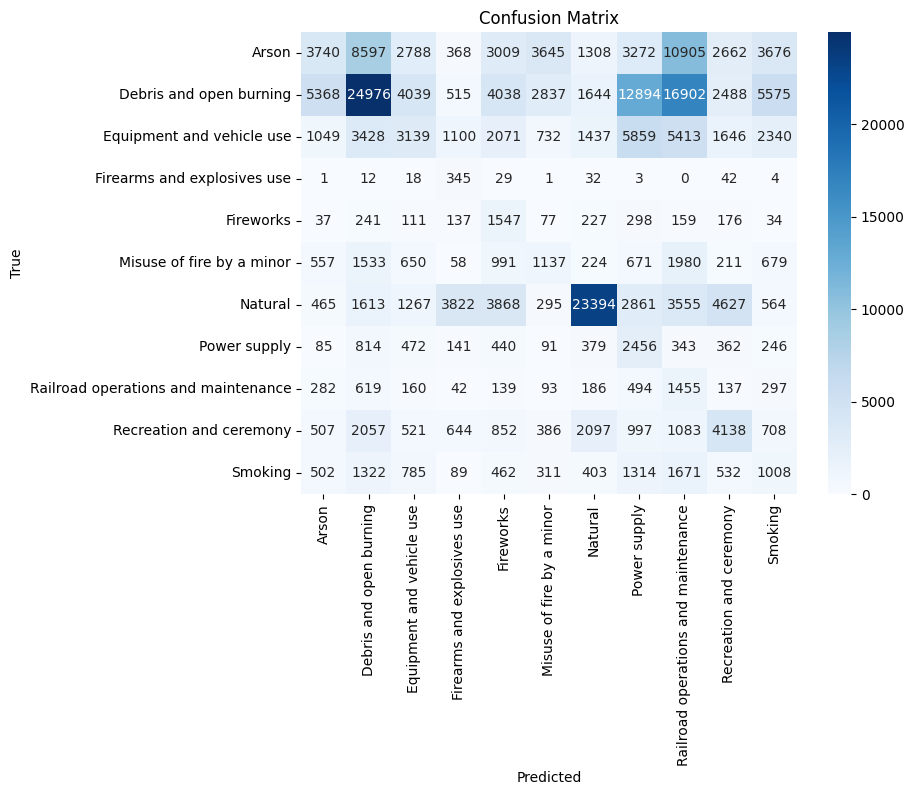

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: 'Arson', 1: 'Debris and open burning', 2: 'Equipment and vehicle use', 3:'Firearms and explosives use', 4: 'Fireworks', 5: 'Misuse of fire by a minor', 6:'Natural', 7:'Power supply',
                8: 'Railroad operations and maintenance', 9: 'Recreation and ceremony', 10: 'Smoking'}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##**Testing L1 and L2 regularization**
Data set changes:

Had to do *PCA before L1 and L2 because it was too computationally expensive* and taking forever. The performance is worst than undersampling.

  Dropping: NWCG_CAUSE_AGE_CATEGORY, NWCG_CAUSE_CLASSIFICATION, NWCG_REPORTING_AGENCY

  Dropping: Other causes + Undetermined

  Merging:

     Firearms and explosives use + Fireworks + Smoking

     Railroad operations and maintenance + Power supply + Equipment and vehicle use

     Arson + Misuse of fire by a minor
     

  f1_l1 = 0.37414510935615564
  
  f1_l2 = 0.37414474057763836


  *I don't think doing PCA before made sense, but couldn't test without it.*

  **Wanted to test feature selection as well, but I'd also need to run L1 regularization**

In [ ]:
model_data_lr5 = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [ ]:
model_data_lr5 = model_data_lr5.drop(['NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural',
       'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)

model_data_lr5['STATE'] = model_data_lr5['STATE'].astype('category')
model_data_lr5['STATE'] = model_data_lr5['STATE'].cat.codes.astype(int)

model_data_lr5['COUNTY_STATE'] = model_data_lr5['COUNTY_STATE'].astype('category')
model_data_lr5['COUNTY_STATE'] = model_data_lr5['COUNTY_STATE'].cat.codes.astype(int)

model_data_lr5['NWCG_GENERAL_CAUSE'] = model_data_lr5['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                                     'Power supply': 'Infrastructure-related causes',
                                                                                     'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                                     'Arson':'Intentional/Planned Fires',
                                                                                     'Misuse of fire by a minor':'Intentional/Planned Fires',
                                                                                     'Smoking':'Behavioral Fires',
                                                                                     'Fireworks':'Behavioral Fires',
                                                                                     'Firearms and explosives use':'Behavioral Fires'})
model_data_lr5 = model_data_lr5[~model_data_lr5['NWCG_GENERAL_CAUSE'].isin(['Other causes', 'Undetermined'])]

model_data_lr5['NWCG_GENERAL_CAUSE'].value_counts()

Debris and open burning          405877
Intentional/Planned Fires        262120
Natural                          231547
Infrastructure-related causes    190808
Recreation and ceremony           69984
Behavioral Fires                  60339
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
model_data_lr5['NWCG_GENERAL_CAUSE'] = model_data_lr5['NWCG_GENERAL_CAUSE'].astype('category')
model_data_lr5['NWCG_GENERAL_CAUSE'] = model_data_lr5['NWCG_GENERAL_CAUSE'].cat.codes.astype(int)

model_data_lr5['NWCG_GENERAL_CAUSE'].value_counts()

1    405877
3    262120
4    231547
2    190808
5     69984
0     60339
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
X5 = model_data_lr5.drop(columns=['NWCG_GENERAL_CAUSE'])
y5 = model_data_lr5['NWCG_GENERAL_CAUSE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the scaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Dimensionality reduction using PCA
pca = PCA(n_components=4)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)

# Create and train Logistic Regression models with L1 and L2 regularization
# L1 Regularization (Lasso)
l1_model = LogisticRegression(penalty='l1', solver='saga', multi_class='auto', max_iter=1000)
l1_model.fit(X_train_pca, y_train)

# L2 Regularization (Ridge)
l2_model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=1000)
l2_model.fit(X_train_pca, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_l1 = l1_model.predict(X_test_pca)
y_pred_l2 = l2_model.predict(X_test_pca)
f1_l1 = f1_score(y_test, y_pred_l1, average='weighted')
f1_l2 = f1_score(y_test, y_pred_l2, average='weighted')

print(f1_l1)
print(f1_l2)

0.37414510935615564
0.37414474057763836


## **Testing changes on the daset**

**Further cleaning/engineering**

In [22]:
model_data_lr2 = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')


In [23]:
model_data_lr2.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [24]:
model_data_lr2 = model_data_lr2.drop(['NWCG_CAUSE_CLASSIFICATION = _Human', 'NWCG_CAUSE_CLASSIFICATION = _Natural', 'NWCG_CAUSE_CLASSIFICATION = _undetermined',
                                      'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural', 'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)

In [25]:
model_data_lr2['NWCG_GENERAL_CAUSE'] = model_data_lr2['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined', 'Undetermined': 'Undetermined'})

In [26]:
model_data_lr2['NWCG_GENERAL_CAUSE'] = model_data_lr2['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes', 'Power supply': 'Infrastructure-related causes', 'Equipment and vehicle use': 'Infrastructure-related causes'})

In [27]:
model_data_lr2['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Undetermined                     461666
Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Recreation and ceremony           69984
Misuse of fire by a minor         43018
Smoking                           42540
Fireworks                         15376
Firearms and explosives use        2423
Name: count, dtype: int64

In [28]:
model_data_lr2.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESC

In [29]:
model_data_lr2['STATE'] = model_data_lr2['STATE'].astype('category')
model_data_lr2['STATE'] = model_data_lr2['STATE'].cat.codes.astype(int) # Numerical values

model_data_lr2['COUNTY_STATE'] = model_data_lr2['COUNTY_STATE'].astype('category')
model_data_lr2['COUNTY_STATE'] = model_data_lr2['COUNTY_STATE'].cat.codes.astype(int) # Numerical values

model_data_lr2['NWCG_GENERAL_CAUSE'] = model_data_lr2['NWCG_GENERAL_CAUSE'].astype('category')
model_data_lr2['NWCG_GENERAL_CAUSE'] = model_data_lr2['NWCG_GENERAL_CAUSE'].cat.codes.astype(int) # Numerical values

In [30]:
model_data_lr2

,FIRE_YEAR,NWCG_GENERAL_CAUSE,FIRE_SIZE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,DAY_OF_WEEK,...,OWNER_DESCR = _FEDERAL,OWNER_DESCR = _FISH AND WILDLIFE SERVICE,OWNER_DESCR = _FOREIGN,OWNER_DESCR = _FOREST SERVICE,OWNER_DESCR = _MUNICIPAL/LOCAL,OWNER_DESCR = _NATIONAL PARK SERVICE,OWNER_DESCR = _NOT SPECIFIED,OWNER_DESCR = _PRIVATE,OWNER_DESCR = _STATE,OWNER_DESCR = _TRIBAL
0,2005,4,0.10,0.0,3,0.01,0.49,3.76,1728,2,...,0,0,0,1,0,0,0,0,0,0
1,2004,6,0.25,0.0,3,0.00,13.36,2.62,1442,2,...,0,0,0,1,0,0,0,0,0,0
2,2004,1,0.10,0.0,3,0.41,19.16,1.80,903,0,...,0,0,0,0,0,0,1,0,0,0
3,2004,6,0.10,5.0,3,0.16,19.36,1.91,2630,0,...,0,0,0,1,0,0,0,0,0,0
4,2004,6,0.10,5.0,3,0.16,19.36,1.91,2630,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682336,2020,6,1.00,0.0,4,2.12,21.78,4.76,1479,4,...,0,0,0,0,0,0,1,0,0,0
1682337,2020,9,100.00,0.0,3,0.00,29.16,2.19,633,5,...,0,0,0,0,0,0,0,1,0,0
1682338,2020,6,50.00,0.0,23,2.74,16.00,1.29,1817,3,...,0,0,0,0,0,0,1,0,0,0
1682339,2020,6,24892.00,3.0,44,0.01,26.43,3.31,292,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
model_data_lr2['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
9    461666
1    405877
6    231547
0    219102
4    190808
7     69984
5     43018
8     42540
3     15376
2      2423
Name: count, dtype: int64

## **Bulding/Training Model**

**Logistic Regression - Dataset 2**

In [32]:
X2 = model_data_lr2.drop(columns=['NWCG_GENERAL_CAUSE'])

y2 = model_data_lr2['NWCG_GENERAL_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the scaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

## **Model Evaluation**

In [33]:
y_pred = model.predict(X_test_scaled_df)
f1 = f1_score(y_test, y_pred, average='weighted')

In [34]:
f1

0.3718785077454385

In [35]:
report2 = classification_report(y_test, y_pred, output_dict=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
report_df2 = pd.DataFrame(report2).transpose()

In [37]:
report_df2

,precision,recall,f1-score,support
0,0.329076,0.102244,0.156015,43846.000000
1,0.391209,0.582656,0.468114,81398.000000
2,0.200000,0.036170,0.061261,470.000000
3,0.328616,0.068123,0.112851,3068.000000
4,0.306152,0.027592,0.050621,38236.000000
5,0.000000,0.000000,0.000000,8631.000000
6,0.602189,0.697036,0.646150,46494.000000
7,0.349830,0.089839,0.142964,13769.000000
8,0.000000,0.000000,0.000000,8480.000000
9,0.412709,0.627931,0.498064,92077.000000


CONSIDERATIONS

Recap:

0 - Arson

1 - Debris and open burning

2 - Firearms and explosives use

3 - Fireworks

4 - Infrastructure-related causes

5 - Misuse of fire by a minor

6 - Natural

7 - Recreation and ceremony

8 - Smoking

9 - Undetermined

Analysis:

 - Model couldn't predict "5 - Misuse of fire by a minor", and "8 - Smoking" at all.

 - Some predictions got more realistic, because I removed those columns.

- Some got a little better and others a little worst with the merging of some categories.

- I'll won't merge/separate them now because I want to see the clusters on the unsupervised learning method. They will tell us.

- For now I'll just conduct further analysis on this test dataset.

## **Feature Importance**

In [ ]:
coefficients = model.coef_

# Calculate feature importance by taking the absolute value of coefficients
feature_importance = np.abs(coefficients)

# Sum feature importance across all classes to get overall importance
overall_importance = np.sum(feature_importance, axis=0)

importance_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Importance': overall_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
7,ELEVATION,3.064709
5,TEMPERATURE,2.945750
1,FIRE_SIZE,2.887809
29,OWNER_DESCR = _FOREST SERVICE,2.083103
0,FIRE_YEAR,1.987219
32,OWNER_DESCR = _NOT SPECIFIED,1.877868
4,PRECIPITATION,1.661170
23,OWNER_DESCR = _BUREAU OF LAND MANAGEMENT,1.637151
12,NWCG_REPORTING_AGENCY = _Bureau of Land Manage...,1.590072
3,STATE,1.519027


In [ ]:
class_labels = {0: 'Arson', 1: 'Debris and open burning', 2: 'Firearms and explosives use', 3:'Fireworks', 4: 'Infrastructure-related causes', 5: 'Misuse of fire by a minor', 6:'Natural', 7:'Recreation and ceremony',
                8: 'Smoking', 9: 'Undetermined'}

<ipython-input-53-7045a3083312>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-53-7045a3083312>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-53-7045a3083312>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-53-7045a3083312>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

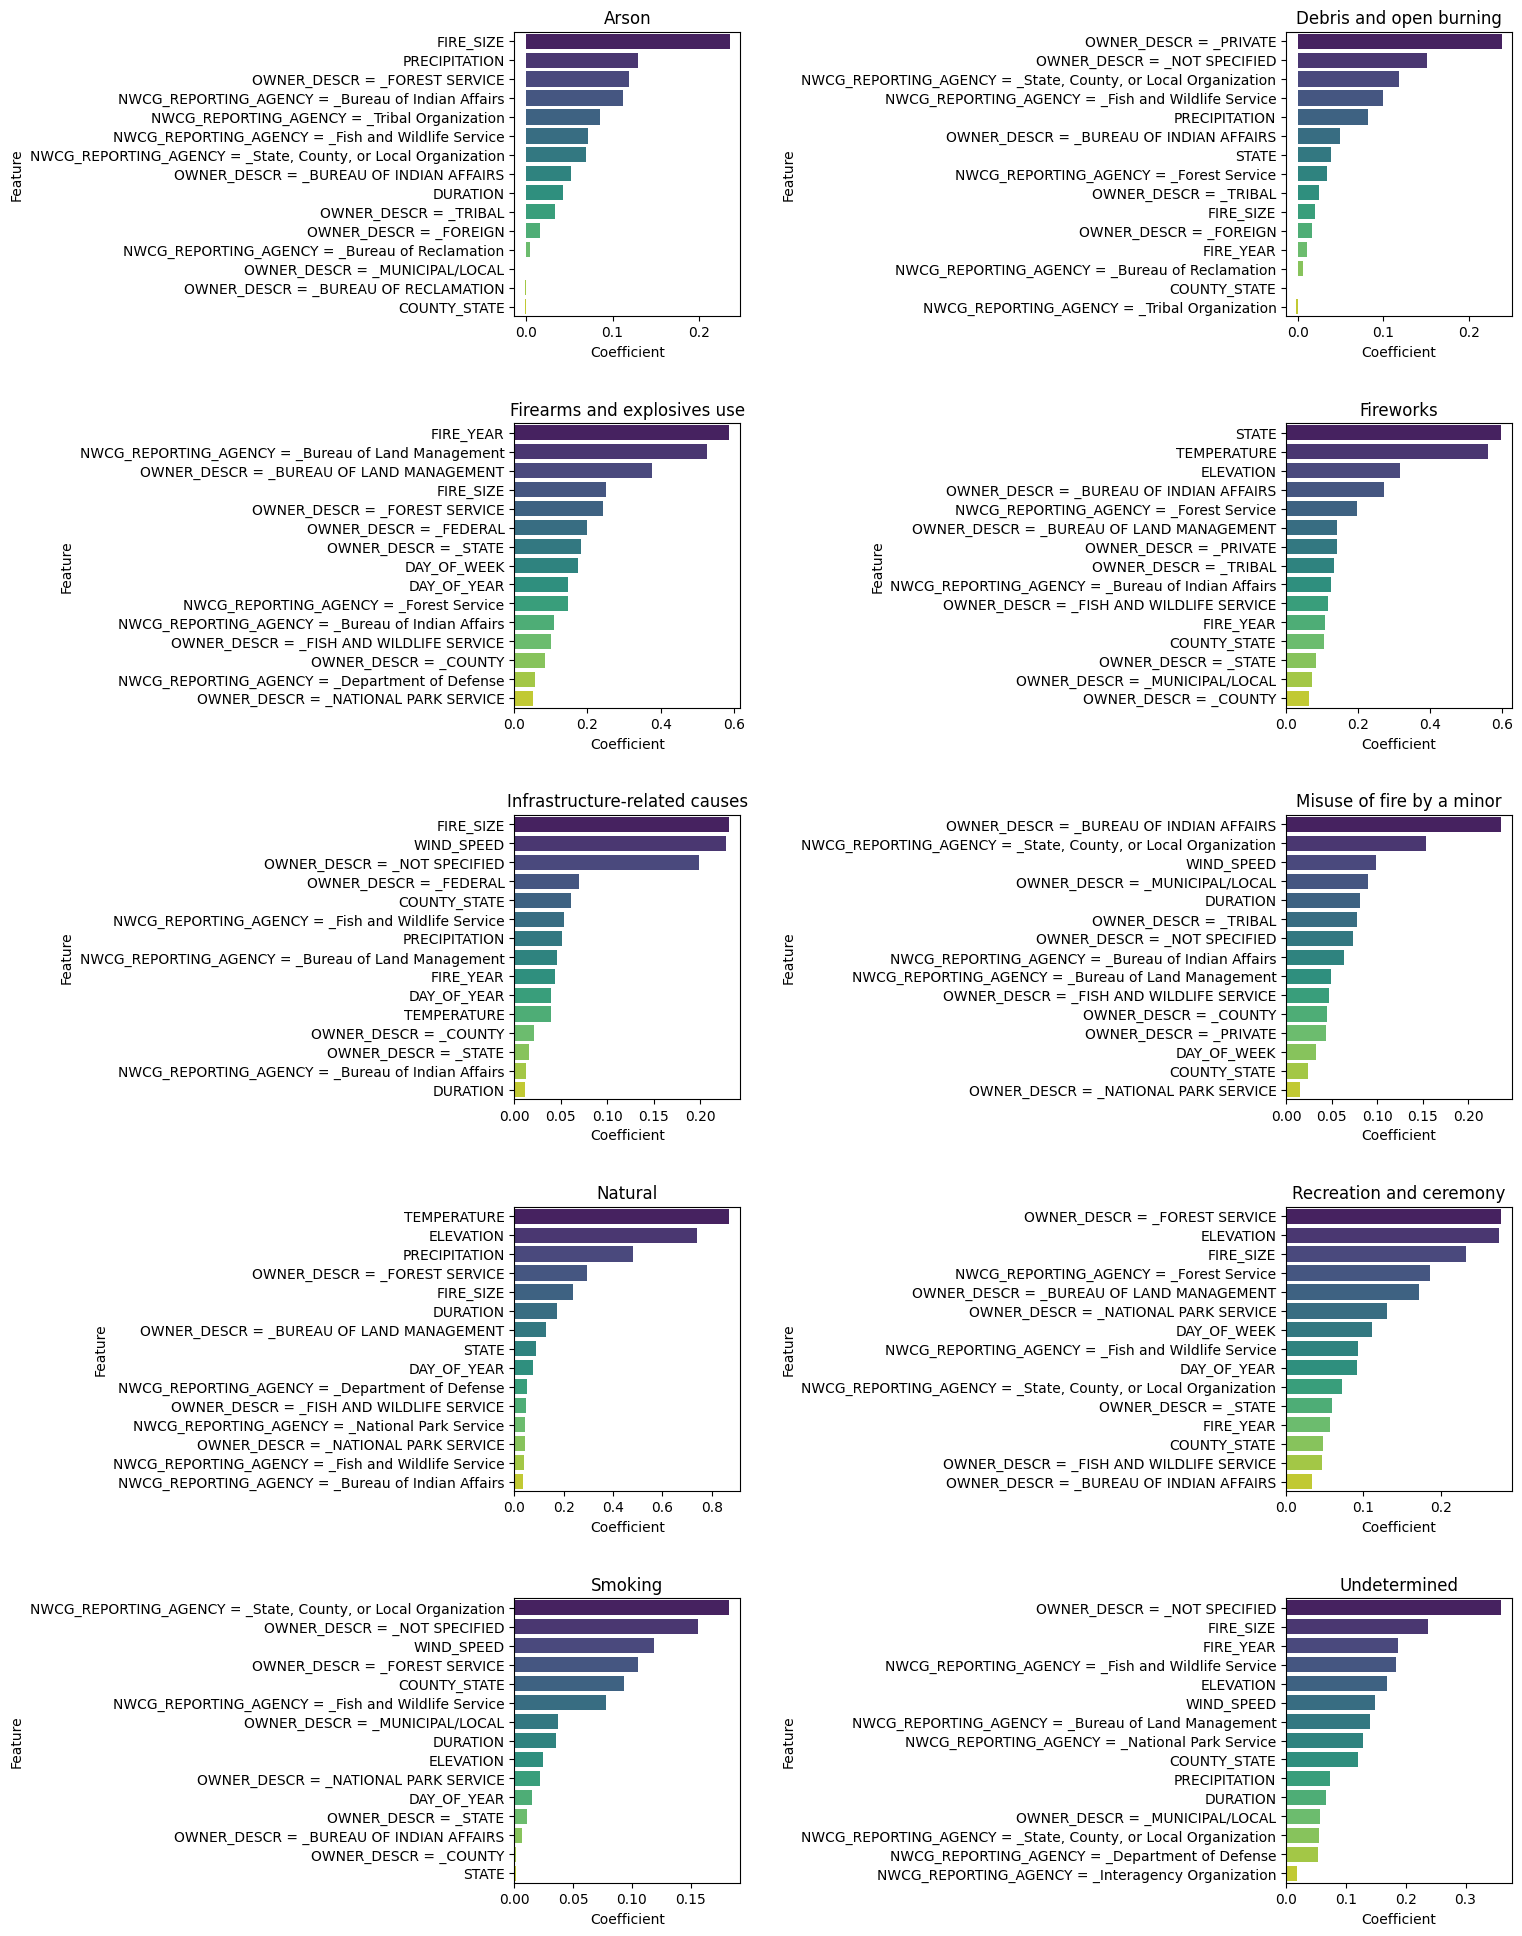

In [ ]:
top_features = {}
top_coefficients = {}
for i in range(len(model.classes_)):
    # Select top 15 features with highest coefficients
    top_indices = np.argsort(-coefficients[i])[:15]
    top_features[model.classes_[i]] = X_train_scaled_df.columns[top_indices]
    top_coefficients[model.classes_[i]] = coefficients[i][top_indices]

plt.figure(figsize=(16, 20))  # Increase figure size for better spacing
for i, (class_label, features) in enumerate(top_features.items()):
    plt.subplot(5, 2, i + 1)  # Adjust the subplot grid size and spacing
    # Get the coefficients for the current class
    class_coefficients = top_coefficients[class_label]
    sns.barplot(x=class_coefficients, y=features, palette='viridis')
    plt.title(class_labels[class_label])  # Set title using class_labels dictionary
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
plt.tight_layout(pad=3.0)  # Add extra padding between subplots
plt.show()

## **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

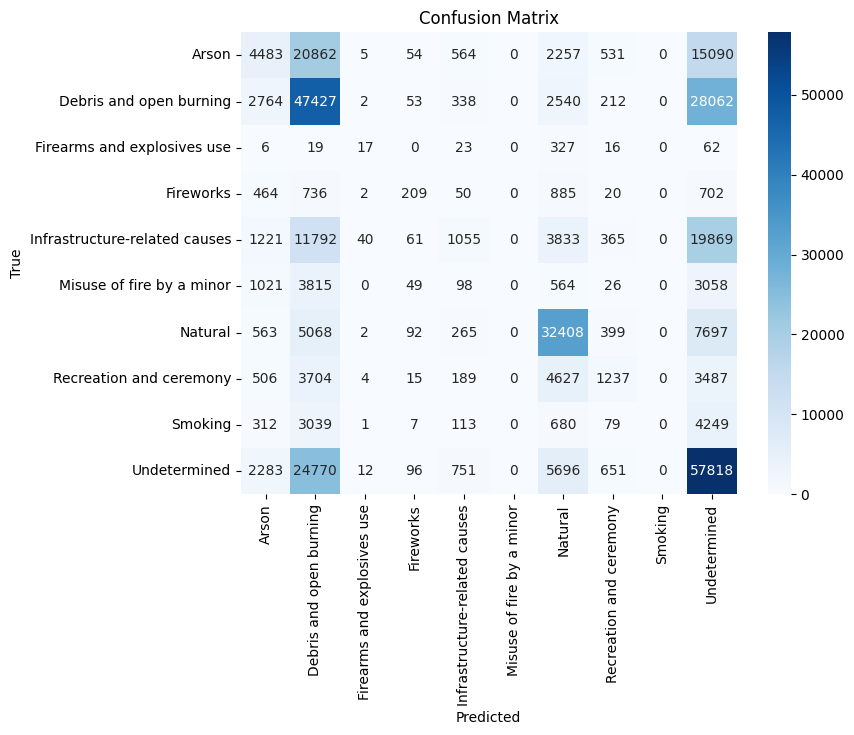

In [42]:
class_labels = {0: 'Arson', 1: 'Debris and open burning', 2: 'Firearms and explosives use', 3:'Fireworks', 4: 'Infrastructure-related causes', 5: 'Misuse of fire by a minor', 6:'Natural', 7:'Recreation and ceremony',
                8: 'Smoking', 9: 'Undetermined'}


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

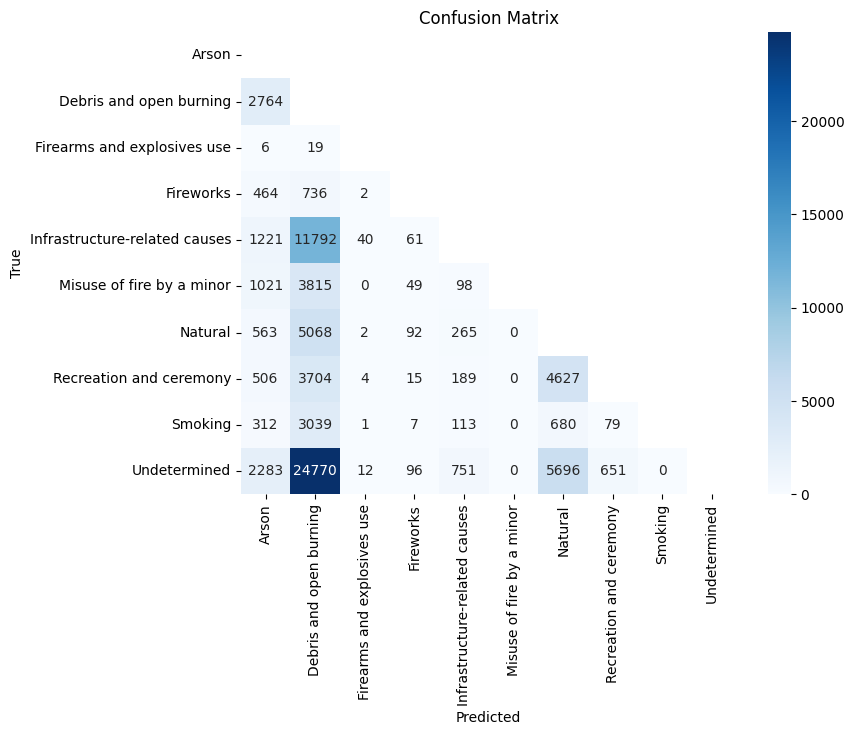

In [43]:
class_labels = {0: 'Arson', 1: 'Debris and open burning', 2: 'Firearms and explosives use', 3:'Fireworks', 4: 'Infrastructure-related causes', 5: 'Misuse of fire by a minor', 6:'Natural', 7:'Recreation and ceremony',
                8: 'Smoking', 9: 'Undetermined'}

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", mask=mask, fmt="d", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

It seems that the model only see a pattern in Debris and Open burning, Natural and Undetermined and try and always predicts those 3


## **Cross-Validation**

In [ ]:
# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute scores
cv_scores = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='f1_weighted')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.37305434 0.37176198 0.37514623 0.37344646 0.37265791]
Mean CV Score: 0.37321338299225626
Standard Deviation of CV Scores: 0.0011163012091904392


All models perform the same basically. The std is very low. So, the problem is not how the data was divided initially, the model is consistent. The problem are the categories themselves.

In [ ]:
model_data_lr3 = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [ ]:
model_data_lr3.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [ ]:
model_data_lr3 = model_data_lr3.drop(['NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural',
       'NWCG_CAUSE_AGE_CATEGORY = _Minor',
       #'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       #'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       #'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESCR = _COUNTY',
       #'OWNER_DESCR = _FEDERAL', 'OWNER_DESCR = _FISH AND WILDLIFE SERVICE',
       #'OWNER_DESCR = _FOREIGN', 'OWNER_DESCR = _FOREST SERVICE',
       #'OWNER_DESCR = _MUNICIPAL/LOCAL',
       #'OWNER_DESCR = _NATIONAL PARK SERVICE', 'OWNER_DESCR = _NOT SPECIFIED',
       #'OWNER_DESCR = _PRIVATE', 'OWNER_DESCR = _STATE',
       #'OWNER_DESCR = _TRIBAL'
       ], axis=1)

In [ ]:
model_data_lr3.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESCR = _COUNTY',
       'OWNER_DESCR = _FEDERAL', 'OWNER_DESCR = _FISH AND WILDLIFE SERVICE',
       'OWNER_DESCR = _FOREIGN', 'OWNER_DESCR = _FOREST SERVICE',
       'OWNER_DESCR = _MUNICIPAL/LOCAL',
       'OWNER_DESCR = _NATIONAL PARK SERVICE', 'OWNER_DESCR = _NOT SPECIFIED',
       'OWNER_DESCR = _PRIVATE', 'OWNER_DESCR = _STATE',
       'OWNER_DESCR = _TRIBAL'],
      dtype='object')

In [ ]:
model_data_lr3['NWCG_GENERAL_CAUSE'] = model_data_lr3['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                                     'Power supply': 'Infrastructure-related causes',
                                                                                     'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                                     'Arson':'Intentional/Planned Fires',
                                                                                     'Misuse of fire by a minor':'Intentional/Planned Fires',
                                                                                     'Debris and open burning':'Outdoor Fires',
                                                                                     'Recreation and ceremony':'Outdoor Fires',
                                                                                     'Smoking':'Behavioral Fires',
                                                                                     'Fireworks':'Behavioral Fires',
                                                                                     'Firearms and explosives use':'Behavioral Fires'})

In [ ]:
model_data_lr3 = model_data_lr3[~model_data_lr3['NWCG_GENERAL_CAUSE'].isin(['Other causes', 'Undetermined'])]

In [ ]:
model_data_lr3['NWCG_GENERAL_CAUSE'].value_counts()

Outdoor Fires                    475861
Intentional/Planned Fires        262120
Natural                          231547
Infrastructure-related causes    190808
Behavioral Fires                  60339
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
model_data_lr3['STATE'] = model_data_lr3['STATE'].astype('category')
model_data_lr3['STATE'] = model_data_lr3['STATE'].cat.codes.astype(int) # Numerical values

model_data_lr3['COUNTY_STATE'] = model_data_lr3['COUNTY_STATE'].astype('category')
model_data_lr3['COUNTY_STATE'] = model_data_lr3['COUNTY_STATE'].cat.codes.astype(int) # Numerical values

model_data_lr3['NWCG_GENERAL_CAUSE'] = model_data_lr3['NWCG_GENERAL_CAUSE'].astype('category')
model_data_lr3['NWCG_GENERAL_CAUSE'] = model_data_lr3['NWCG_GENERAL_CAUSE'].cat.codes.astype(int) # Numerical values

In [ ]:
model_data_lr3['NWCG_GENERAL_CAUSE'].value_counts()

4    475861
2    262120
3    231547
1    190808
0     60339
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
X3 = model_data_lr3.drop(columns=['NWCG_GENERAL_CAUSE'])
y3 = model_data_lr3['NWCG_GENERAL_CAUSE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the scaler to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Apply under-sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_scaled_df, y_train)

# Train the logistic regression model on the resampled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test_scaled_df)
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
f1

0.44673768998140395

In [ ]:
report3 = classification_report(y_test, y_pred, output_dict=True)

report_df3 = pd.DataFrame(report3).transpose()

report_df3

,precision,recall,f1-score,support
0,0.113821,0.180721,0.139673,11930.000000
1,0.283303,0.376841,0.323445,37947.000000
2,0.367766,0.410987,0.388177,52661.000000
3,0.633615,0.756642,0.689685,46331.000000
4,0.577156,0.366773,0.448519,95266.000000
accuracy,0.442771,0.442771,0.442771,0.442771
macro avg,0.395132,0.418393,0.397900,244135.000000
weighted avg,0.474387,0.442771,0.446738,244135.000000


In [ ]:
coefficients = model.coef_

# Calculate feature importance by taking the absolute value of coefficients
feature_importance = np.abs(coefficients)

# Sum feature importance across all classes to get overall importance
overall_importance = np.sum(feature_importance, axis=0)

importance_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Importance': overall_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
7,ELEVATION,1.688095
5,TEMPERATURE,1.613729
4,PRECIPITATION,0.747895
11,OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS,0.738354
18,OWNER_DESCR = _FOREST SERVICE,0.652353
12,OWNER_DESCR = _BUREAU OF LAND MANAGEMENT,0.641709
6,WIND_SPEED,0.632169
0,FIRE_YEAR,0.543303
21,OWNER_DESCR = _NOT SPECIFIED,0.498037
2,DURATION,0.360656


<ipython-input-63-ed85d5ed0685>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-63-ed85d5ed0685>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-63-ed85d5ed0685>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_coefficients, y=features, palette='viridis')
<ipython-input-63-ed85d5ed0685>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

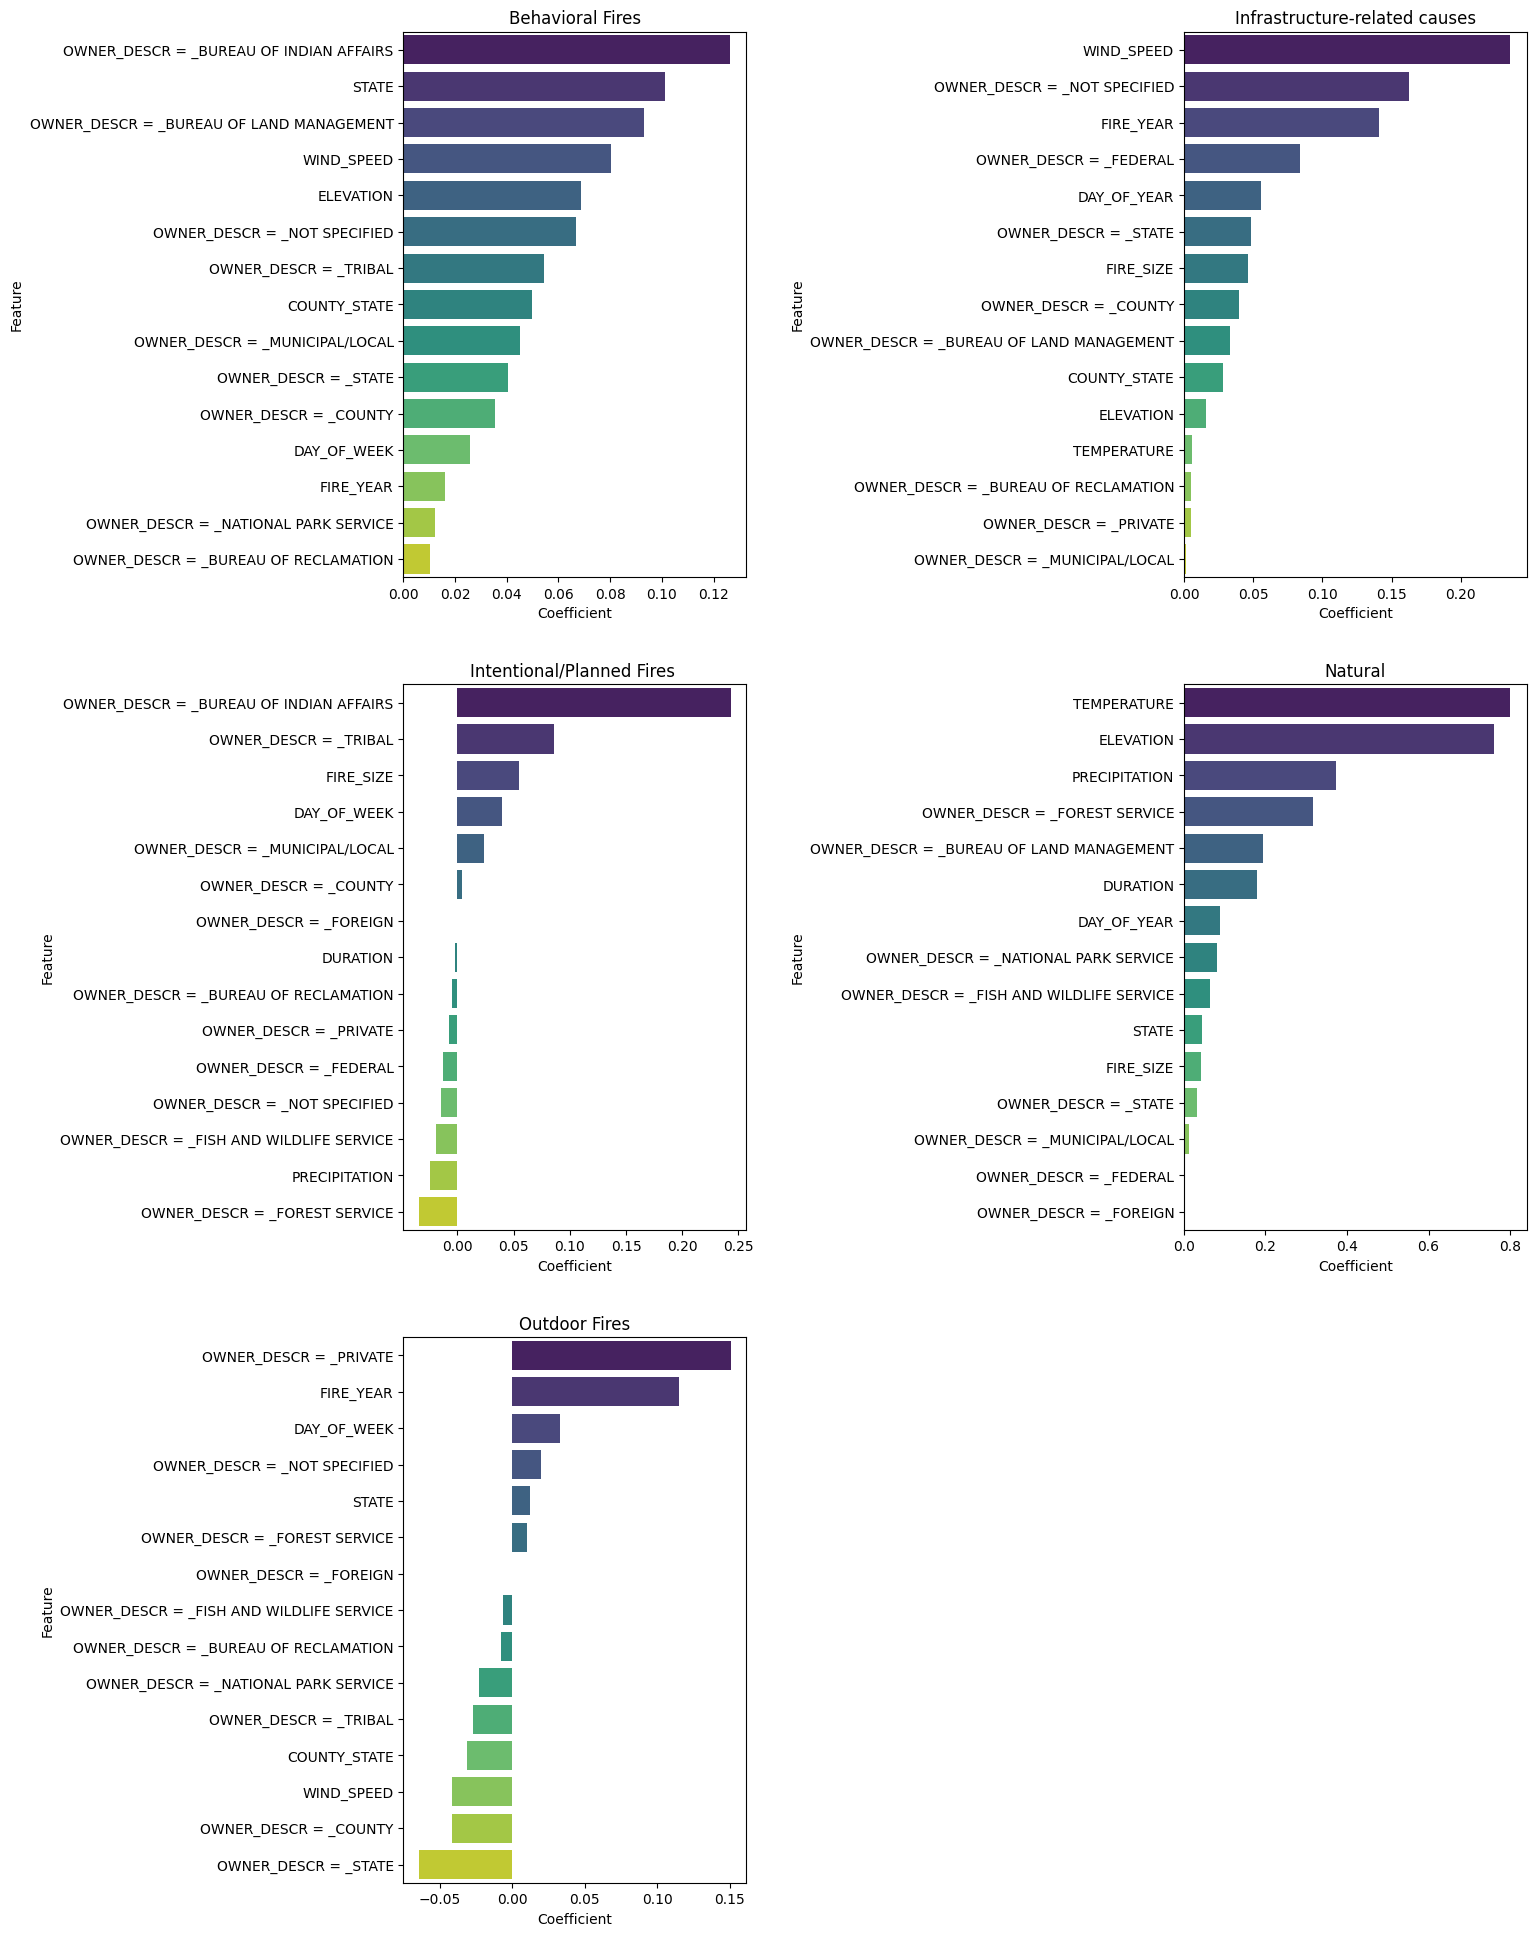

In [ ]:
class_labels = {0: 'Behavioral Fires', 1: 'Infrastructure-related causes', 2: 'Intentional/Planned Fires ', 3:'Natural', 4: 'Outdoor Fires'}


top_features = {}
top_coefficients = {}
for i in range(len(model.classes_)):
    # Select top 15 features with highest coefficients
    top_indices = np.argsort(-coefficients[i])[:15]
    top_features[model.classes_[i]] = X_train_scaled_df.columns[top_indices]
    top_coefficients[model.classes_[i]] = coefficients[i][top_indices]

plt.figure(figsize=(16, 20))  # Increase figure size for better spacing
for i, (class_label, features) in enumerate(top_features.items()):
    plt.subplot(3, 2, i + 1)  # Adjust the subplot grid size and spacing
    # Get the coefficients for the current class
    class_coefficients = top_coefficients[class_label]
    sns.barplot(x=class_coefficients, y=features, palette='viridis')
    plt.title(class_labels[class_label])  # Set title using class_labels dictionary
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
plt.tight_layout(pad=3.0)  # Add extra padding between subplots
plt.show()

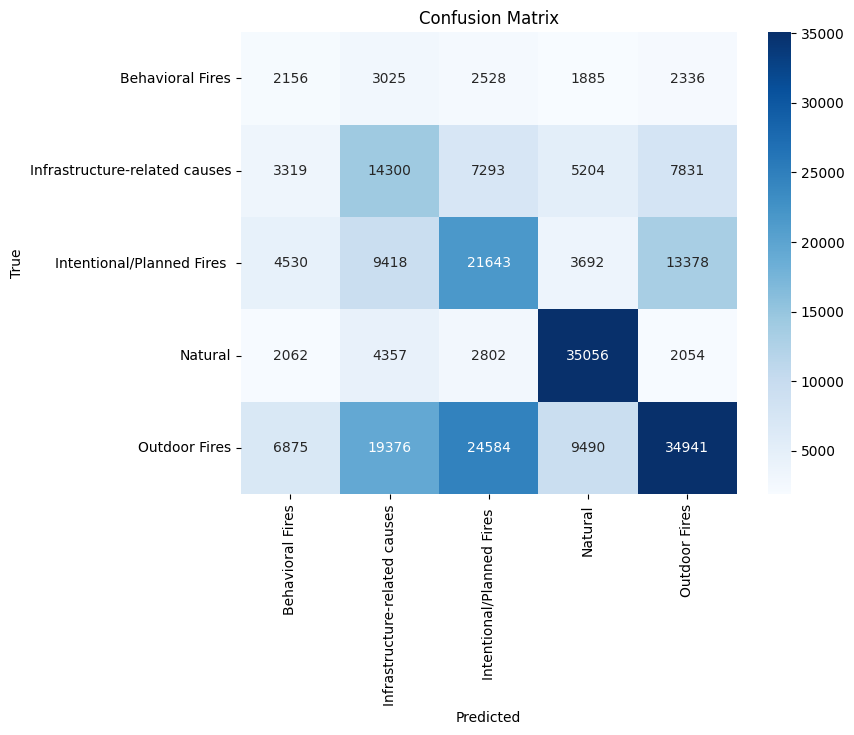

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: 'Behavioral Fires', 1: 'Infrastructure-related causes', 2: 'Intentional/Planned Fires ', 3:'Natural', 4: 'Outdoor Fires'}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()